In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\bhoom\\Early detection of Stroke\\healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Filling null values

In [6]:
from sklearn.impute import KNNImputer

In [7]:
imputer = KNNImputer(n_neighbors = 5)
df['bmi'] = imputer.fit_transform(df[['bmi']])

In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [10]:
df.drop('id',axis=1,inplace=True)

In [11]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


Outlier removal

In [12]:
from matplotlib.pyplot import figure

In [13]:
figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

<AxesSubplot:>

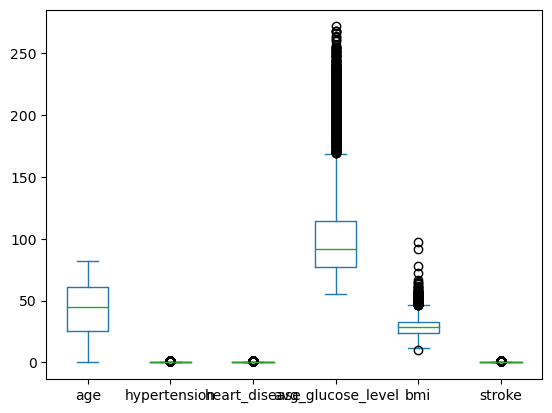

In [14]:
df.plot(kind='box')

In [15]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [16]:
gender=encode.fit_transform(df['gender'])

In [17]:
ever_married=encode.fit_transform(df['ever_married'])

In [18]:
work_type=encode.fit_transform(df['work_type'])

In [19]:
Residence_type=encode.fit_transform(df['Residence_type'])

In [20]:
smoking_status=encode.fit_transform(df['smoking_status'])

In [21]:
df['gender']=gender
df['ever_married']=ever_married
df['work_type']=work_type
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status

In [22]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [23]:
X=df.drop('stroke',axis=1)

In [24]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [25]:
Y=df['stroke']

In [26]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [28]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3378,1,51.00,0,0,0,3,0,219.17,29.800000,2
479,1,54.00,1,0,1,2,0,198.69,28.893237,3
3683,1,80.00,0,1,1,3,0,95.49,31.600000,0
2997,1,71.00,0,1,1,2,1,204.98,28.893237,1
286,0,23.00,0,0,0,2,1,94.09,30.900000,2
...,...,...,...,...,...,...,...,...,...,...
4426,1,43.00,0,0,1,0,0,88.00,30.600000,2
466,0,61.00,1,0,1,2,0,170.05,60.200000,3
3092,0,1.16,0,0,0,4,1,97.28,17.800000,0
3772,1,80.00,0,0,1,3,0,196.08,31.000000,1


In [29]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,1,31.0,0,0,0,3,0,64.85,23.0,0
4478,1,40.0,0,0,1,3,0,65.29,28.3,2
3849,0,8.0,0,0,0,4,1,74.42,22.5,0
4355,0,79.0,1,0,1,3,0,76.64,19.5,2
3826,0,75.0,0,0,1,0,0,94.77,27.2,2
...,...,...,...,...,...,...,...,...,...,...
319,0,29.0,0,0,0,2,1,71.89,27.6,2
2399,0,33.0,0,0,1,3,0,112.94,43.0,2
1589,0,17.0,0,0,0,0,0,115.93,23.3,2
682,1,20.0,0,0,0,2,1,55.25,20.4,2


In [30]:
y_train

3378    0
479     0
3683    0
2997    0
286     0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 3423, dtype: int64

In [31]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
319     0
2399    0
1589    0
682     0
4540    0
Name: stroke, Length: 1687, dtype: int64

In [32]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
std=StandardScaler()

In [35]:
x_train_std=std.fit_transform(x_train)
x_test_std=std.transform(x_test)

In [103]:
import pickle
import os

In [104]:
#Saving scalar object
scalar_path=os.path.join('C:/Users/bhoom/Early detection of Stroke','models/scalar.pkl')
with open(scalar_path,'wb') as scalar_file:
    pickle.dump(std,scalar_file)

In [36]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()

In [37]:
decision.fit(x_train_std,y_train)

DecisionTreeClassifier()

In [38]:
y_pred_dt=decision.predict(x_test_std)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
ac_dt=accuracy_score(y_test,y_pred_dt)

In [41]:
ac_dt

0.9069353882631891

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1591
           1       0.16      0.16      0.16        96

    accuracy                           0.91      1687
   macro avg       0.56      0.55      0.56      1687
weighted avg       0.90      0.91      0.91      1687



In [43]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [44]:
forest.fit(x_train_std,y_train)

RandomForestClassifier()

In [45]:
y_pred_rf=forest.predict(x_test_std)

In [46]:
from sklearn.metrics import accuracy_score
ac_rf=accuracy_score(y_test,y_pred_rf)

In [47]:
ac_rf

0.942501481920569

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687



In [49]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(x_train_std,y_train)

AdaBoostClassifier()

In [50]:
y_pred_adb=adb.predict(x_test_std)

In [51]:
from sklearn.metrics import accuracy_score
ac_adb=accuracy_score(y_test,y_pred_adb)

In [52]:
ac_adb

0.9407231772377

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_adb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.17      0.01      0.02        96

    accuracy                           0.94      1687
   macro avg       0.56      0.50      0.49      1687
weighted avg       0.90      0.94      0.92      1687



In [54]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
BNBclf = BernoulliNB()
BNBclf.fit(x_train_std,y_train)

BernoulliNB()

In [55]:
y_pred_bnb=BNBclf.predict(x_test_std)

In [56]:
from sklearn.metrics import accuracy_score
ac_bnb=accuracy_score(y_test,y_pred_bnb)

In [57]:
ac_bnb

0.9377593360995851

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_bnb))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1591
           1       0.24      0.04      0.07        96

    accuracy                           0.94      1687
   macro avg       0.59      0.52      0.52      1687
weighted avg       0.90      0.94      0.92      1687



In [59]:
#Neural Network
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x_train_std,y_train)

C:\Users\bhoom\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [60]:
y_pred_mlp=clf.predict(x_test_std)

In [61]:
from sklearn.metrics import accuracy_score
ac_mlp=accuracy_score(y_test,y_pred_mlp)

In [62]:
ac_mlp

0.943094250148192

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687



C:\Users\bhoom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhoom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhoom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
#Bagging classifier
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier()
bag.fit(x_train_std,y_train)

BaggingClassifier()

In [65]:
y_pred_bag=bag.predict(x_test_std)

In [66]:
from sklearn.metrics import accuracy_score
ac_bag=accuracy_score(y_test,y_pred_bag)

In [67]:
ac_bag

0.9377593360995851

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_bag))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1591
           1       0.24      0.04      0.07        96

    accuracy                           0.94      1687
   macro avg       0.59      0.52      0.52      1687
weighted avg       0.90      0.94      0.92      1687



%pip install lightgbm

In [69]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(x_train_std,y_train)

LGBMClassifier()

In [70]:
y_pred_lgbm=lgbm.predict(x_test_std)

In [71]:
from sklearn.metrics import accuracy_score
ac_lgbm=accuracy_score(y_test,y_pred_lgbm)

In [72]:
ac_lgbm

0.943687018375815

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1591
           1       0.55      0.06      0.11        96

    accuracy                           0.94      1687
   macro avg       0.75      0.53      0.54      1687
weighted avg       0.92      0.94      0.92      1687



In [74]:
#SVM
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train_std,y_train)

SVC()

In [75]:
y_pred_sv=sv.predict(x_test_std)

In [76]:
ac_sv=accuracy_score(y_test,y_pred_sv)

In [77]:
ac_sv

0.943094250148192

In [78]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687



C:\Users\bhoom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhoom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhoom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_std,y_train)

KNeighborsClassifier()

In [80]:
y_pred_knn=knn.predict(x_test_std)

In [81]:
ac_knn=accuracy_score(y_test,y_pred_knn)

In [82]:
ac_knn

0.941908713692946

In [83]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.25      0.01      0.02        96

    accuracy                           0.94      1687
   macro avg       0.60      0.50      0.50      1687
weighted avg       0.90      0.94      0.92      1687



In [84]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train_std,y_train)

LogisticRegression()

In [85]:
y_pred_lg=lg.predict(x_test_std)

In [86]:
ac_lg=accuracy_score(y_test,y_pred_lg)

In [87]:
ac_lg

0.943094250148192

In [88]:
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1591
           1       0.00      0.00      0.00        96

    accuracy                           0.94      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.94      0.92      1687



C:\Users\bhoom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhoom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhoom\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
ac_dt

0.9069353882631891

In [90]:
ac_rf

0.942501481920569

In [91]:
ac_adb

0.9407231772377

In [92]:
ac_bnb

0.9377593360995851

In [93]:
ac_mlp

0.943094250148192

In [94]:
ac_bag

0.9377593360995851

In [95]:
ac_lgbm

0.943687018375815

In [96]:
ac_sv

0.943094250148192

In [97]:
ac_knn

0.941908713692946

In [98]:
ac_lg

0.943094250148192

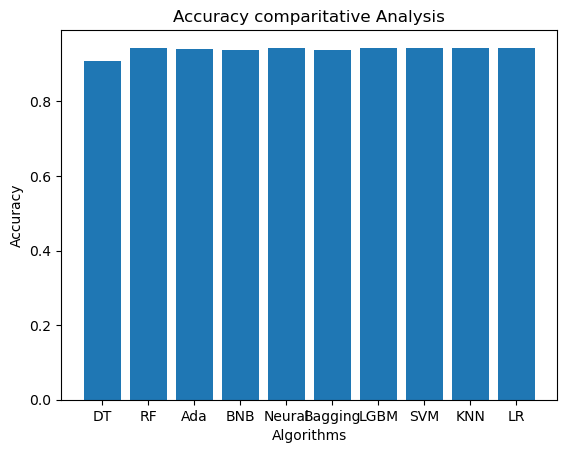

In [99]:
plt.bar(['DT','RF','Ada','BNB','Neural','Bagging','LGBM','SVM','KNN','LR'],[ac_dt,ac_rf,ac_adb,ac_bnb,ac_mlp,ac_bag,ac_lgbm,ac_sv,ac_knn,ac_lg])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy comparitative Analysis")
plt.show()

In [105]:
import joblib

In [106]:
model_path=os.path.join('C:/Users/bhoom/Early detection of Stroke','models/lgbm.sav')
joblib.dump(lgbm,model_path)

['C:/Users/bhoom/Early detection of Stroke\\models/lgbm.sav']